In [1]:

#import matplotlib.pyplot as plt
#plt.close("all")
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix


# 1. scatter plot matrix

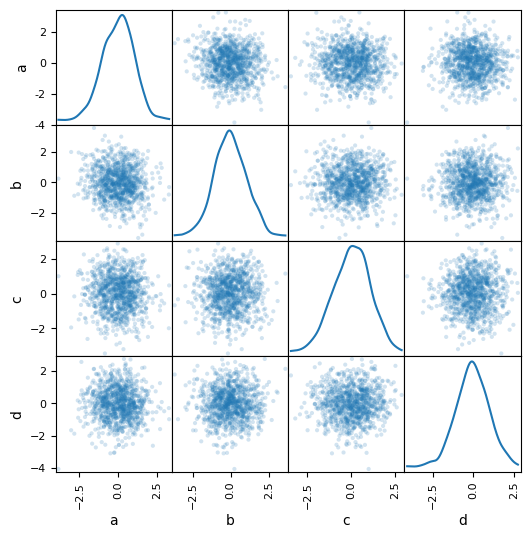

In [2]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])


#1.1 density plot diagonaly
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde");

### 1.2 histogram plot diagonaly

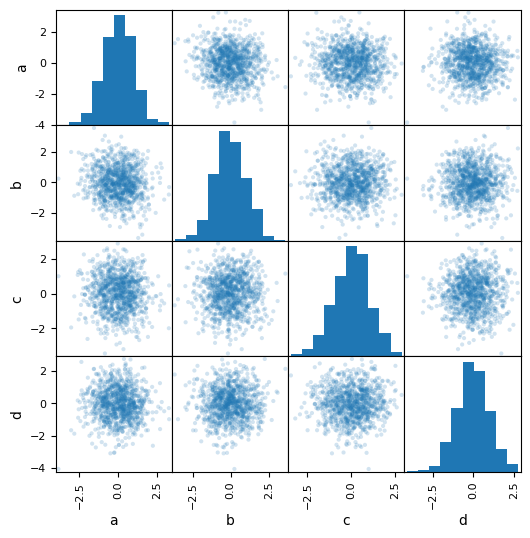

In [3]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="hist");

### 1.2 density plot diagonaly (coloured)

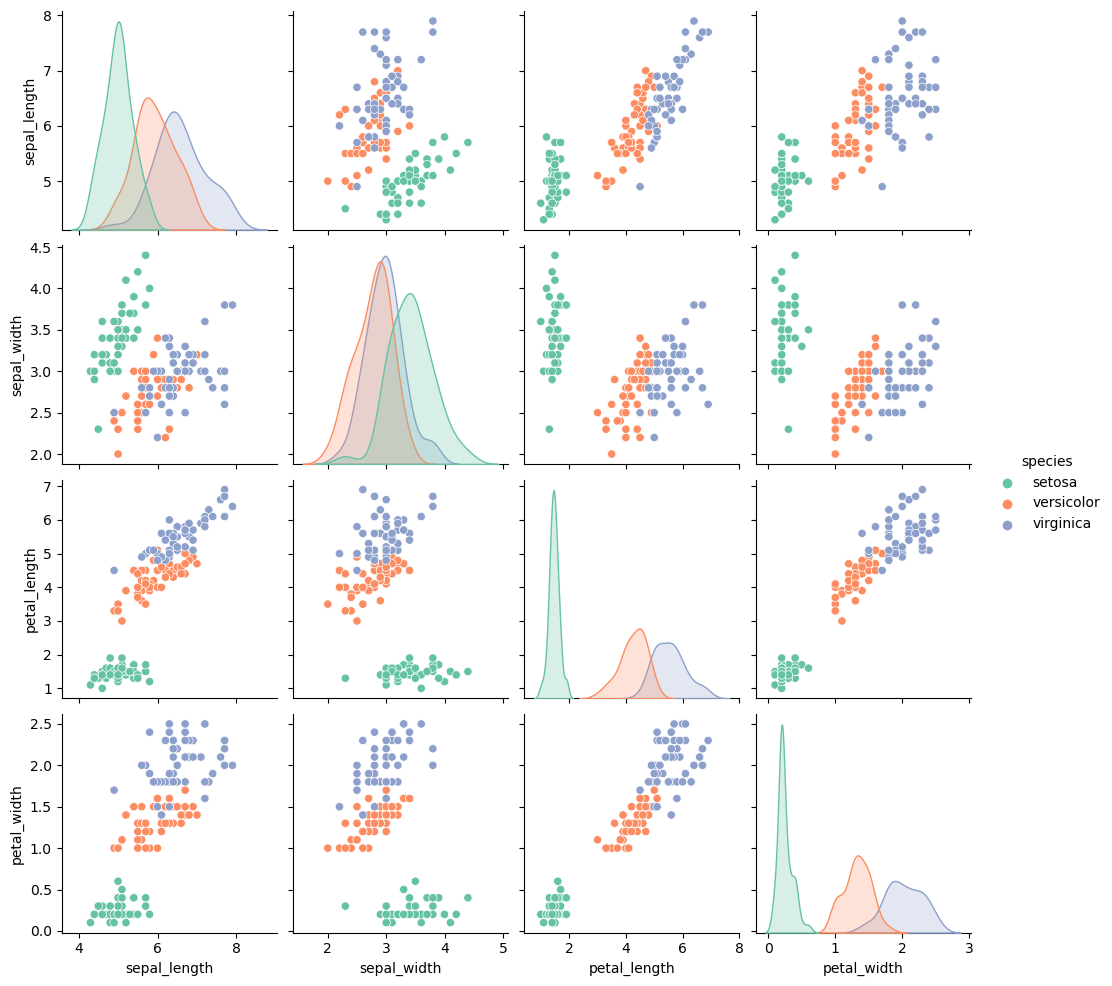

In [4]:
import seaborn as sns
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)



### 1.3 line plot diagonally

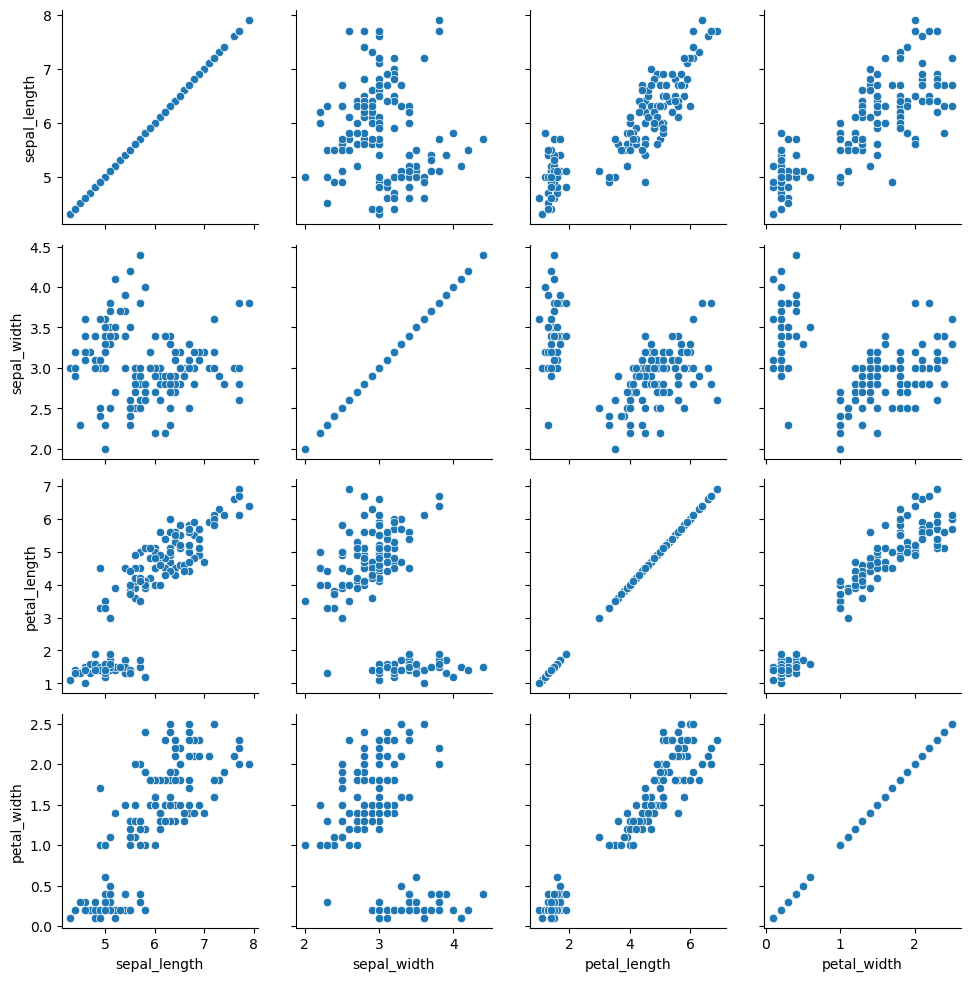

In [5]:
import seaborn as sns
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

In [ ]:
#1.4 box plot diagonaly
#pip install plotly
#pip install colorlover
#pip install chart_studio
import plotly
import pandas as pd
import numpy as np
#import plotly.plotly as py  #error may occure
import chart_studio.plotly as py
from chart_studio import plotly
import plotly.figure_factory as ff
dataframe = pd.DataFrame(np.random.randn(10, 4),
                         columns=['Column A', 'Column B', 'Column C', 'Column D'])

dataframe['Fruit'] = pd.Series(['apple', 'apple', 'grape', 'apple', 'apple',
                                'grape', 'pear', 'pear', 'apple', 'pear'])


fig = ff.create_scatterplotmatrix(dataframe, diag='box', index='Fruit',
                                  height=800, width=800)
fig
#py.iplot(fig, filename='B')

In [ ]:
#2. andrews curve
#2.1 andrews curve (without normalization)
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt
plt.close("all")
data = pd.read_csv(r"J:\storage 4\drive_1\data shop\iris.csv")
plt.figure();
andrews_curves(data, "Species");

#2.2 Normalization of andrews curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# making data frame from csv file
df = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv'
)
 ## Creating Andrews curves
x = pd.plotting.andrews_curves(df, 'Name') 
# plotting the Curve
x.plot()
# Display
plt.show()

#3.parallel coordinate plot
from pandas.plotting import parallel_coordinates
data = pd.read_csv(r"J:\storage 4\drive_1\data shop\iris.csv")
plt.figure();
parallel_coordinates(data, "Species");


#4.growth curve
#pip install xlrd
import pandas as pd
import matplotlib.pyplot as plt
readings = pd.read_excel(r'C:\Users\Abdullah Sayeed\Desktop\data bank\growth_profile.xlsx')
readings
x_data=readings['Time']
y_data=readings[readings.columns[1::]]
plt.plot(x_data,y_data)
plt.title('Growth Curve',fontsize=16)
plt.xlabel('Time [h]',fontsize=14)
plt.ylabel('O. D. 600nm',fontsize=14)
plt.show()

#5. Q-Q Plot
#pip install seaborn_qqplot
import seaborn as sns
from seaborn_qqplot import pplot
from statsmodels.graphics.gofplots import qqplot
iris = sns.load_dataset('iris')
pplot(iris, x="petal_length", y="sepal_length", kind='qq')
pplot(iris, x="sepal_length", y="petal_length", kind='qq', height=4, aspect=2)
pplot(iris, x="sepal_length", y="petal_length", hue="species", kind='qq', height=4, aspect=2)
from scipy.stats import gamma
pplot(iris, x="sepal_length", y=gamma, hue="species", kind='qq', height=4, aspect=2)
pplot(iris, x="sepal_length", y=gamma, hue="species", kind='qq', height=4, aspect=2, display_kws={"identity":True})
pplot(iris, x="sepal_length", y="petal_length", hue="species", kind='qq', height=4, aspect=2, display_kws={"identity":False, "fit":True})
pplot(iris, x="sepal_length", y=gamma, hue="species", kind='qq', height=4, aspect=2, display_kws={"identity":False, "fit":True, "reg":True, "ci":0.025})


#6. generating data from multivariate normal distribution
#6.1 generating data from multivariate normal distribution
import numpy as np
mean = [0.4, 0.3, 0.2]
matrix = [[1, 0.4, 0.9], [0.4, 1, 0.7], [0.9, 0.7, 1]]
# using np.multinomial() method
gfg = np.random.multivariate_normal(mean, matrix, 5)
  
print(gfg)

# 6.2 generating data from multivariate standard normal distribution
# import numpy
import numpy as np
  
mean = [0, 0, 0]
matrix = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
# using np.multinomial() method
gfg = np.random.multivariate_normal(mean, matrix, 5)
  
print(gfg)

#7. MLE of mean vector and variance covariance matrix
np.random.seed(123)
from scipy.stats import norm
#
N = 100
beta_0 = 3
beta_1 = 8
#
X = np.random.normal(loc = 10, scale = 2, size = N)
e = np.random.normal(loc = 0, scale = 2, size = len(X))
Y = beta_0 + beta_1 * X + e

def log_lik(par_vec, y, x):
    # If the standard deviation prameter is negative, return a large value:
    if par_vec[2] < 0:
        return(1e8)
    # The likelihood function values:
    lik = norm.pdf(y, 
                   loc = par_vec[0] + par_vec[1] * x, 
                   scale = par_vec[2])
    #This is similar to calculating the likelihood for Y - XB
    # res = y - par_vec[0] - par_vec[1] * x
    # lik = norm.pdf(res, loc = 0, sd = par_vec[2])
    
    # If all logarithms are zero, return a large value
    if all(v == 0 for v in lik):
        return(1e8)
    # Logarithm of zero = -Inf
    return(-sum(np.log(lik[np.nonzero(lik)])))

import scipy.optimize as optimize
#
opt_res = optimize.minimize(fun = log_lik, 
                            x0 = [0, 0, 10], 
                            args = (Y, X))
print(opt_res)

print(opt_res.x)  #MLE of mean vector
print(np.sqrt(np.diag(opt_res.hess_inv)))  #MLE of variances